# Time Series

Time series are is a series of data points indexed in time order. They have 5 key features that are necessary to understand when training ML models: **trend**, **seasonality**, **autocorrelation**, **impulses**, and **noise**.

### Initializations

In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 10
fig_size[1] = 7.5

time = np.arange(4 * 365 + 1)

def plotter(time, series, format = '-', start = 0, end = None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xlabel('Time')
    plt.ylabel('Value')
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)

2.1.0


----

## Trend

**Trend** is a direct correlation between the time and value.

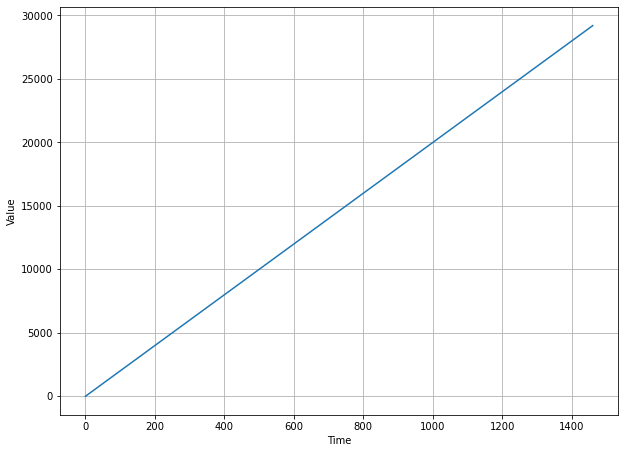

In [7]:
def trend(time, slope = 0):
    return time * slope

slope = 20
series = trend(time, slope)

plotter(time, series)
plt.show()

----

## Seasonality

**Seasonality** is a trait present in data when it has repeating trends.

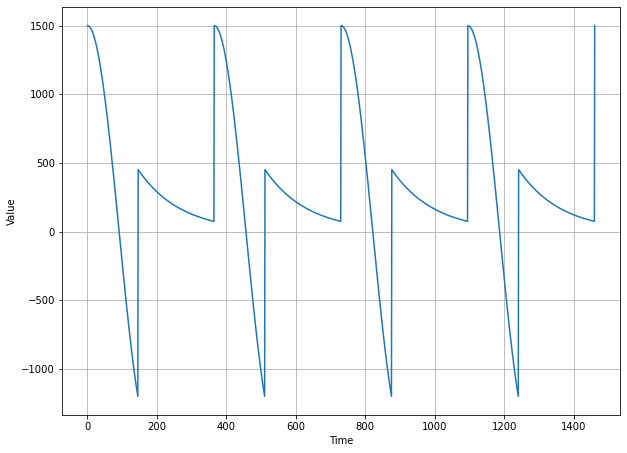

In [3]:
def seasonality(time, period, amplitude = 1, phase = 0):
    season_time = ((time + phase) % period) / period
    
    return amplitude * np.where(
        season_time < 0.4, 
        np.cos(season_time * 2 * np.pi),
        1 / np.exp(3 * season_time)
    )

seasonality_amplitude = 1500
period = 365
series = seasonality(time, period, seasonality_amplitude)

plotter(time, series)
plt.show()

----

## Autocorrelation

**Autocorrelation** occurs when data in future time stamps are dependendent upon data in previous time stamps. The sudden jumps in data are called *innovations* and can't be predicted. *Lag* is the time gap between values that are autocorrelated.

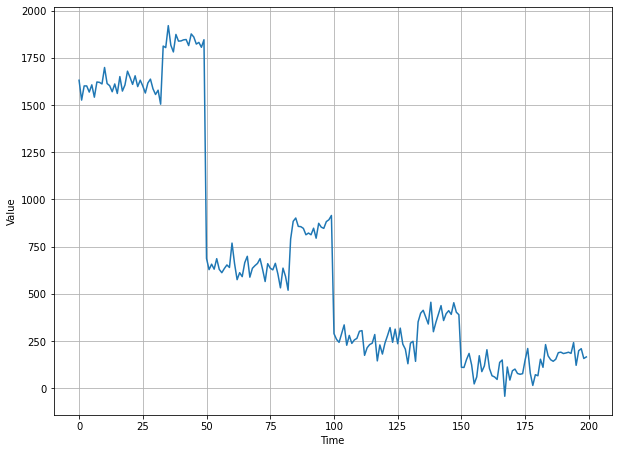

In [10]:
def autocorrelation(time, amplitude, seed = None):
    series = np.random.RandomState(seed).randn(len(time) + 50)
    series[:50] = 100
    
    for step in range(50, len(time) + 50):
        series[step] += 0.5 * series[step - 50]
        series[step] += -0.1 * series[step - 33]
        
    return series[50:] * amplitude

autocorrelation_amplitude = 40
series = autocorrelation(time, autocorrelation_amplitude, seed = 4)
plotter(time[:200], series[:200])
plt.show()

----

## Noise (White Noise)

**Noise** is can be thought of as the uncertainty when sampling.

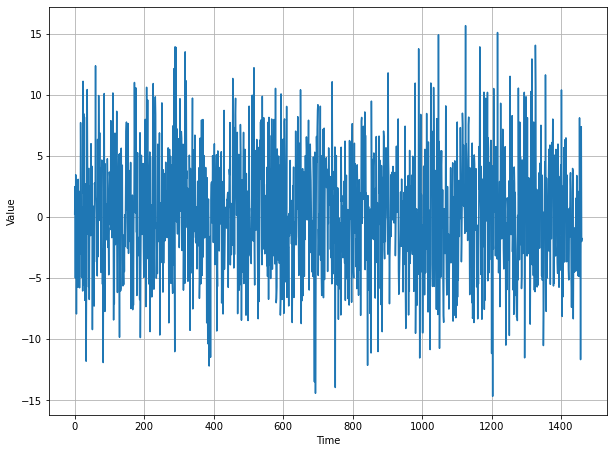

In [4]:
def noise(time, noise_level = 1, seed = None):
    return np.random.RandomState(seed).randn(len(time)) * noise_level

noise_level = 5
series = noise(time, noise_level, seed = 4)

plotter(time, series)
plt.show()

----

## Impulses

**Impulses** are sudden spikes in data that aren't retained for a long period of time.

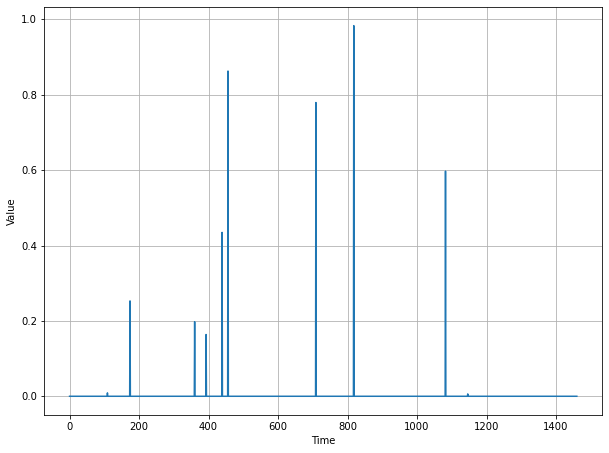

In [17]:
def impulses(time, impulse_count, amplitude = 1, seed = None):
    generator = np.random.RandomState(seed)
    impulse_indices = generator.randint(len(time), size = impulse_count)
    series = np.zeros(len(time))
    
    for index in impulse_indices:
        series[index] += generator.rand() * amplitude
        
    return series

impulse_count = 10
series = impulses(time, impulse_count, seed = 4)

plotter(time, series)
plt.show()

----

## Trend, Seasonality & Autocorrelation /w Noise

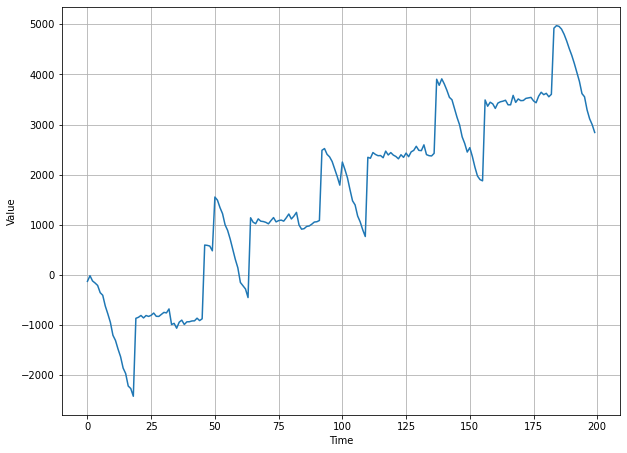

In [13]:
series = (
    trend(time, slope) + 
    seasonality(time, (period / 8), seasonality_amplitude) -
    autocorrelation(time, autocorrelation_amplitude, seed = 4) +
    noise(time, noise_level, seed = 4)
)

plotter(time[:200], series[:200])
plt.show()

----

## Note: Non-Stationary Time Series

**Non-Stationary Time Series** are time series that follow a different pattern of regression after some time *T*.

[]

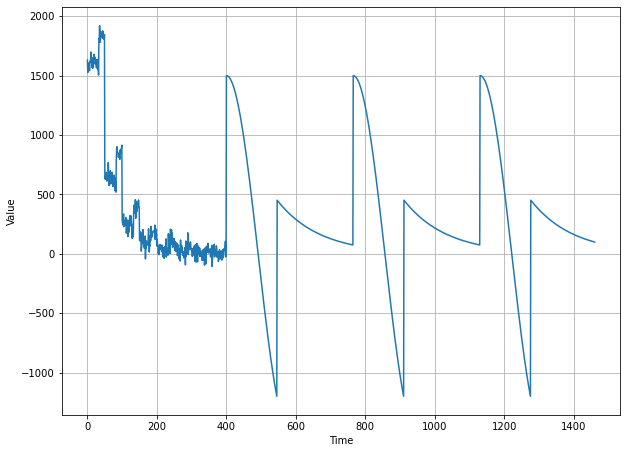

In [25]:
series = np.append(
    autocorrelation(time, autocorrelation_amplitude, seed = 4)[:400],
    seasonality(time, period, seasonality_amplitude)[:1061]
)
    
plotter(time, series)
plt.plot()